In [1]:
from selenium import webdriver
import pandas as pd
import time
from tqdm import tqdm
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import font_manager, rc
import seaborn as sns    

/Users/gunwook/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
mpl.rcParams['axes.unicode_minus'] = False #그래프에서 - 폰트 깨지는거 방지
fontlocation="/System/Library/Fonts/AppleSDGothicNeo.ttc"
font_name = font_manager.FontProperties(fname=fontlocation).get_name()
mpl.rc('font', family=font_name)

## KBO Statiz 사이트 접속

In [296]:
driver=webdriver.Chrome('/Users/gunwook/Desktop/chromedriver')

In [285]:
driver.get('http://www.statiz.co.kr/stat.php')

## 타자 크롤링

In [87]:
driver.get('http://www.statiz.co.kr/stat.php?mid=stat&re=0&ys=2014&ye=2019&se=0&te=&tm=&ty=0&qu=auto&po=0&as=&ae=&hi=&un=&pl=&da=1&o1=WAR_ALL_ADJ&o2=TPA&de=1&lr=0&tr=&cv=&ml=1&sn=200&pa={0}&si=&cn='.format(200))

In [379]:
number = driver.find_elements_by_css_selector('#fixcol > table > tbody > tr > td:nth-child(1)')

In [94]:
driver.find_elements_by_css_selector('#fixcol > table > tbody > tr > td:nth-child(3) > span > span:nth-child(3)')[0].text

'1B'

In [ ]:
#fixcol > table > tbody > tr:nth-child(2105) > td:nth-child(3) > span > span:nth-child(3)

In [153]:
# 선수 정보 뽑기
# PA는 타석
# AB는 타수
list1 = []
for i in tqdm(range(0,5074, 30)):
    driver.get('http://www.statiz.co.kr/stat.php?mid=stat&re=0&ys=2002&ye=2019&se=0&te=&tm=&ty=0&qu=auto&po=0&as=&ae=&hi=&un=&pl=&da=1&o1=WAR_ALL_ADJ&o2=TPA&de=1&lr=0&tr=&cv=&ml=1&sn=30&pa={0}&si=&cn='.format(i))
    time.sleep(2)
    position = driver.find_elements_by_css_selector('#fixcol > table > tbody > tr > td:nth-child(3) > span > span:nth-child(3)')
    number = driver.find_elements_by_css_selector('#fixcol > table > tbody > tr > td:nth-child(1)')
    name = driver.find_elements_by_css_selector('#fixcol > table > tbody > tr > td > a')
    year = driver.find_elements_by_css_selector('#fixcol > table > tbody > tr > td > span > span:nth-child(1)')
    team = driver.find_elements_by_css_selector('#fixcol > table > tbody > tr > td > span > span:nth-child(2)')
    war = driver.find_elements_by_css_selector('#fixcol > table > tbody > tr > td:nth-child(4)')
    count_game = driver.find_elements_by_css_selector('#mytable > tbody > tr > td:nth-child(5)')
    득점 = driver.find_elements_by_css_selector('#mytable > tbody > tr > td:nth-child(8)')
    안타 = driver.find_elements_by_css_selector('#mytable > tbody > tr > td:nth-child(9)')
    홈런 = driver.find_elements_by_css_selector('#mytable > tbody > tr > td:nth-child(12)')
    루타 = driver.find_elements_by_css_selector('#mytable > tbody > tr > td:nth-child(13)')
    타점 = driver.find_elements_by_css_selector('#mytable > tbody > tr > td:nth-child(14)')
    도루 = driver.find_elements_by_css_selector('#mytable > tbody > tr > td:nth-child(15)')
    볼넷 = driver.find_elements_by_css_selector('#mytable > tbody > tr > td:nth-child(17)')
    삼진 = driver.find_elements_by_css_selector('#mytable > tbody > tr > td:nth-child(20)')
    병살 = driver.find_elements_by_css_selector('#mytable > tbody > tr > td:nth-child(21)')
    타율 = driver.find_elements_by_css_selector('#mytable > tbody > tr > td:nth-child(24)')
    출루 = driver.find_elements_by_css_selector('#mytable > tbody > tr > td:nth-child(25)')
    장타 = driver.find_elements_by_css_selector('#mytable > tbody > tr > td:nth-child(26)')
    OPS = driver.find_elements_by_css_selector('#mytable > tbody > tr > td:nth-child(27)')
    wOBA = driver.find_elements_by_css_selector('#mytable > tbody > tr > td:nth-child(28)')
    wRC = driver.find_elements_by_css_selector('#mytable > tbody > tr > td:nth-child(29)')
    for a,b,c,d,e,f,g,h,i,j,k,l,n,m,o,p,q,z,x,r,s,zz in zip(name,year,team,war,
                                                    count_game,득점,안타,홈런,루타,타점,
                                                    타율,출루,장타,OPS,wOBA,wRC,number,도루,볼넷,
                                                삼진,병살,position):
        if zz.text == 'P':
            continue
        if q.text == '':
            continue
        else:
            if k.text == '':
                k = 0
            else:
                k = k.text
            if l.text == '':
                l = 0
            else:
                l = l.text
            if n.text == '':
                n = 0
            else:
                n = n.text
            if m.text == '':
                m = 0
            else:
                m = m.text
            if o.text == '':
                o = 0
            else:
                o = o.text
            if p.text == '':
                p = 0
            else:
                p = p.text

            list1.append([a.text,b.text,c.text,float(d.text),float(e.text),
                          float(f.text),float(g.text),
                float(h.text),float(i.text),float(j.text),float(k),float(l),
                float(n),float(m),float(o),float(p),float(z.text),
                          float(x.text),float(r.text),float(s.text)])







  0%|          | 0/170 [00:00<?, ?it/s]


  1%|          | 1/170 [00:12<34:08, 12.12s/it]


  1%|          | 2/170 [00:25<34:55, 12.47s/it]


  2%|▏         | 3/170 [00:38<35:00, 12.58s/it]


  2%|▏         | 4/170 [00:50<34:07, 12.34s/it]


  3%|▎         | 5/170 [01:02<33:38, 12.23s/it]


  4%|▎         | 6/170 [01:13<32:52, 12.03s/it]


  4%|▍         | 7/170 [01:25<32:23, 11.92s/it]


  5%|▍         | 8/170 [01:37<32:14, 11.94s/it]


  5%|▌         | 9/170 [01:48<31:46, 11.84s/it]


  6%|▌         | 10/170 [02:00<31:34, 11.84s/it]


  6%|▋         | 11/170 [02:12<31:18, 11.81s/it]


  7%|▋         | 12/170 [02:24<31:18, 11.89s/it]


  8%|▊         | 13/170 [02:36<30:59, 11.85s/it]


  8%|▊         | 14/170 [02:47<30:41, 11.81s/it]


  9%|▉         | 15/170 [02:59<30:39, 11.87s/it]


  9%|▉         | 16/170 [03:17<34:55, 13.61s/it]


 10%|█         | 17/170 [03:33<36:44, 14.41s/it]


 11%|█         | 18/170 [03:52<39:34, 15.62s/it]


 11%|█         | 19/170 [04:10<41:09, 16.36s/i

In [154]:
df = pd.DataFrame(list1, columns = ['이름', '년도', '소속팀','war',
                                                    '경기수','득점','안타','홈런','루타','타점',
                                                    '타율','출루','장타','OPS','wOBA','wRC','도루','볼넷',
                                                '삼진','병살'])

In [156]:
df.to_csv('타자 크롤링.csv')

## 투수 크롤링

In [ ]:
#mytable > tbody > tr:nth-child(3) > td:nth-child(21) > font > span

In [89]:
# 선수 정보 뽑기

list2 = []
for i in tqdm(range(0,3639, 200)):
    driver.get('http://www.statiz.co.kr/stat.php?mid=stat&re=1&ys=2002&ye=2019&se=0&te=&tm=&ty=0&qu=auto&po=0&as=&ae=&hi=&un=&pl=&da=1&o1=WAR&o2=OutCount&de=1&lr=0&tr=&cv=&ml=1&sn=200&pa={0}&si=&cn='.format(i))
    time.sleep(2)
    
    number = driver.find_elements_by_css_selector('#fixcol > table > tbody > tr > td:nth-child(1)')
    name = driver.find_elements_by_css_selector('#fixcol > table > tbody > tr > td > a')
    year = driver.find_elements_by_css_selector('#fixcol > table > tbody > tr > td > span > span:nth-child(1)')
    team = driver.find_elements_by_css_selector('#fixcol > table > tbody > tr > td > span > span:nth-child(2)')
    war = driver.find_elements_by_css_selector('#fixcol > table > tbody > tr > td:nth-child(4)')
    count_game = driver.find_elements_by_css_selector('#mytable > tbody > tr > td:nth-child(5)')
    완봉 = driver.find_elements_by_css_selector('#mytable > tbody > tr > td:nth-child(6)')
    완투 = driver.find_elements_by_css_selector('#mytable > tbody > tr > td:nth-child(7)')
    선발 = driver.find_elements_by_css_selector('#mytable > tbody > tr > td:nth-child(8)')
    승 = driver.find_elements_by_css_selector('#mytable > tbody > tr > td:nth-child(9) ')
    패 = driver.find_elements_by_css_selector('#mytable > tbody > tr > td:nth-child(10)')
    세이브 = driver.find_elements_by_css_selector('#mytable > tbody > tr > td:nth-child(11)')
    홀드 = driver.find_elements_by_css_selector('#mytable > tbody > tr > td:nth-child(12)')
    inning = driver.find_elements_by_css_selector('#mytable > tbody > tr > td:nth-child(13)')
    실점 = driver.find_elements_by_css_selector('#mytable > tbody > tr > td:nth-child(14)')
    자책 = driver.find_elements_by_css_selector('#mytable > tbody > tr > td:nth-child(15)')
    볼넷 = driver.find_elements_by_css_selector('#mytable > tbody > tr > td:nth-child(21)')
    홈런 = driver.find_elements_by_css_selector('#mytable > tbody > tr > td:nth-child(20)')
    삼진 = driver.find_elements_by_css_selector('#mytable > tbody > tr > td:nth-child(24)')
    ERA = driver.find_elements_by_css_selector('#mytable > tbody > tr > td:nth-child(27)')
    FIP = driver.find_elements_by_css_selector('#mytable > tbody > tr > td:nth-child(28)')
    WHIP= driver.find_elements_by_css_selector('#mytable > tbody > tr > td:nth-child(29)')
    ERA_plus = driver.find_elements_by_css_selector('#mytable > tbody > tr > td:nth-child(30)')
    FIP_plus = driver.find_elements_by_css_selector('#mytable > tbody > tr > td:nth-child(31)')
    for a,b,c,d,e,f,g,h,i,j,k,l,n,m,o,p,q,r,s,z,zz,zx,xz,x in zip(name,year,team,war,
                                                       count_game,완봉,완투,선발,승,패,세이브,홀드,
                                                       inning,실점,ERA,FIP,WHIP,ERA_plus,FIP_plus,자책,볼넷,홈런,삼진,number):
        if x.text == '':
            continue
        else:
            if s.text == '':
                s = 0
            else:
                s = s.text
            if r.text == '':
                r = 0
            else:
                r = r.text
            if q.text == '':
                q = 0
            else:
                q = q.text
            if p.text == '':
                p = 0
            else:
                p = p.text
            if o.text == '':
                o = 0
            else:
                o = o.text
            list2.append([a.text,b.text,c.text,float(d.text),float(e.text),float(f.text),float(g.text),
                     float(h.text),float(i.text),float(j.text),float(k.text),float(l.text),
                     float(n.text),float(m.text),float(o),float(p),float(q),float(r),
                          float(s),float(z.text),float(zz.text),float(zx.text),float(xz.text)])








  0%|          | 0/19 [00:00<?, ?it/s]



  5%|▌         | 1/19 [02:33<45:58, 153.25s/it]



 11%|█         | 2/19 [05:33<45:42, 161.31s/it]



 16%|█▌        | 3/19 [08:34<44:34, 167.17s/it]



 21%|██        | 4/19 [11:43<43:25, 173.72s/it]



 26%|██▋       | 5/19 [14:35<40:25, 173.25s/it]



 32%|███▏      | 6/19 [17:40<38:17, 176.71s/it]



 37%|███▋      | 7/19 [20:36<35:20, 176.73s/it]



 42%|████▏     | 8/19 [23:27<32:04, 174.97s/it]



 47%|████▋     | 9/19 [26:24<29:14, 175.46s/it]



 53%|█████▎    | 10/19 [29:14<26:04, 173.88s/it]



 58%|█████▊    | 11/19 [32:08<23:10, 173.86s/it]



 63%|██████▎   | 12/19 [35:05<20:23, 174.79s/it]



 68%|██████▊   | 13/19 [37:28<16:32, 165.36s/it]



 74%|███████▎  | 14/19 [38:58<11:53, 142.79s/it]



 79%|███████▉  | 15/19 [40:46<08:48, 132.23s/it]



 84%|████████▍ | 16/19 [42:33<06:13, 124.58s/it]



 89%|████████▉ | 17/19 [44:19<03:58, 119.18s/it]



 95%|█████████▍| 18/19 [46:21<02:00, 120.07s/it]



100%|██████████| 19/19 [46:

In [91]:
df = pd.DataFrame(list2, columns = ['이름','년도','팀','war',
                    '경기수','완봉','완투',"선발",'승','패','세이브','홀드',
                                                       'inning','실점','ERA','FIP','WHIP','ERA_plus','FIP_plus','자책','볼넷','홈런','삼진'])

In [94]:
df.to_csv('투수 크롤링.csv')

In [164]:
df1 = pd.read_csv('타자 크롤링.csv')

# 타자 연봉 크롤링

In [170]:
name = list(df1['이름'].unique())

In [171]:
name

['테임즈',
 '심정수',
 '이승엽',
 '이대호',
 '브룸바',
 '박경완',
 '강정호',
 '박석민',
 '박병호',
 '최형우',
 '서건창',
 '김재환',
 '김동주',
 '최정',
 '김하성',
 '김현수',
 '이종범',
 '박건우',
 '김태균',
 '정근우',
 '양준혁',
 '양의지',
 '나바로',
 '페르난데스',
 '데이비스',
 '손아섭',
 '홍성흔',
 '샌즈',
 '나성범',
 '서튼',
 '장성호',
 '조인성',
 '유한준',
 '김상현',
 '박용택',
 '조성환',
 '이병규',
 '전준우',
 '로하스',
 '이범호',
 '마해영',
 '송지만',
 '황재균',
 '이용규',
 '박재홍',
 '정성훈',
 '박한이',
 '이영우',
 '강민호',
 '이종욱',
 '이진영',
 '이택근',
 '러프',
 '로사리오',
 '이호준',
 '최희섭',
 '버나디나',
 '페타지니',
 '크루즈',
 '브리또',
 '김재현',
 '구자욱',
 '안치홍',
 '안경현',
 '김선빈',
 '고영민',
 '박진만',
 '이정후',
 '히메네스',
 '김종국',
 '마르테',
 '로맥',
 '진갑용',
 '강백호',
 '채은성',
 '박민우',
 '아두치',
 '김한수',
 '최주환',
 '박경수',
 '가르시아',
 '강동우',
 '민병헌',
 '호세',
 '클락',
 '강봉규',
 '오지환',
 '홍세완',
 '이현곤',
 '채태인',
 '심재학',
 '김동수',
 '스크럭스',
 '채종범',
 '전준호',
 '나지완',
 '이재원',
 '오재일',
 '김주찬',
 '김강민',
 '디아즈',
 '김태완',
 '클리어',
 '이천웅',
 '박정권',
 '최준석',
 '김원섭',
 '김재호',
 '에반스',
 '배영섭',
 '한동민',
 '호잉',
 '김민성',
 '유강남',
 '조동찬',
 '허경민',
 '오재원',
 '최재훈',
 '박해민',
 '이도형',
 '최진행',
 '신명철',
 '박종호',
 '정훈',
 '발데스',


In [312]:
list4= []
for i in tqdm(name):
    #elem = driver.find_element_by_id('search_text')
    #elem.clear()
    #elem.send_keys(i)
    #driver.find_elements_by_css_selector('#search-btn')[0].click()
    #time.sleep(5)
    #driver.find_elements_by_css_selector('body > div.wrapper > div.content-wrapper > div > section.content > div > div:nth-child(1) > div > div.col-xs-12.col-sm-8.col-md-8.col-lg-12 > div > div.table-responsive.no-padding.box > table > tbody > tr > td > a:nth-child(9)')[0].click()
    driver.get('http://www.statiz.co.kr/player.php?opt=11&name={0}'.format(i))
    year = driver.find_elements_by_css_selector('body > div.wrapper > div.content-wrapper > div > section.content > div > div:nth-child(2) > div > div > div > div.box-body.no-padding > table > tbody > tr > td:nth-child(1)')
    money = driver.find_elements_by_css_selector('body > div.wrapper > div.content-wrapper > div > section.content > div > div:nth-child(2) > div > div > div > div.box-body.no-padding > table > tbody > tr > td:nth-child(2)')
    position =  driver.find_element_by_xpath('/html/body/div[1]/div[1]/div/section[2]/div/div[1]/div/div[1]/div')
    if '투수' in position.text:
        continue
    
    
    for j,k in zip(year,money):
        if k.text == '':
            k = 0
            list4.append([i,int(j.text[2:4]),k])
        else:
            list4.append([i,int(j.text[2:4]),int(k.text.replace(',',''))])















  0%|          | 0/819 [00:00<?, ?it/s]













  0%|          | 1/819 [00:00<12:36,  1.08it/s]













  0%|          | 2/819 [00:02<16:54,  1.24s/it]













  0%|          | 3/819 [00:03<13:09,  1.03it/s]













  0%|          | 4/819 [00:04<14:33,  1.07s/it]













  1%|          | 5/819 [00:05<14:45,  1.09s/it]













  1%|          | 6/819 [00:06<14:53,  1.10s/it]













  1%|          | 7/819 [00:07<13:04,  1.04it/s]













  1%|          | 8/819 [00:08<13:43,  1.02s/it]













  1%|          | 9/819 [00:09<11:22,  1.19it/s]













  1%|          | 10/819 [00:10<11:56,  1.13it/s]













  1%|▏         | 11/819 [00:10<11:47,  1.14it/s]













  1%|▏         | 12/819 [00:11<11:54,  1.13it/s]













  2%|▏         | 13/819 [00:12<12:33,  1.07it/s]













  2%|▏         | 14/819 [00:13<12:38,  1.06it/s]













  2%|▏         | 15/819 [00:14<11:41,  1.15it/s]













  2%|▏      

 19%|█▉        | 156/819 [02:11<08:55,  1.24it/s]













 19%|█▉        | 157/819 [02:12<09:23,  1.17it/s]













 19%|█▉        | 158/819 [02:14<10:30,  1.05it/s]













 19%|█▉        | 159/819 [02:15<10:35,  1.04it/s]













 20%|█▉        | 160/819 [02:16<11:04,  1.01s/it]













 20%|█▉        | 161/819 [02:17<10:52,  1.01it/s]













 20%|█▉        | 162/819 [02:18<10:45,  1.02it/s]













 20%|█▉        | 163/819 [02:18<08:46,  1.25it/s]













 20%|██        | 164/819 [02:19<09:06,  1.20it/s]













 20%|██        | 165/819 [02:19<08:07,  1.34it/s]













 20%|██        | 166/819 [02:20<07:19,  1.48it/s]













 20%|██        | 167/819 [02:20<06:27,  1.68it/s]













 21%|██        | 168/819 [02:21<06:09,  1.76it/s]













 21%|██        | 169/819 [02:21<05:35,  1.94it/s]













 21%|██        | 170/819 [02:22<05:02,  2.14it/s]













 21%|██        | 171/819 [02:22<04:40,  2.31it/s]







 38%|███▊      | 312/819 [04:20<12:19,  1.46s/it]













 38%|███▊      | 313/819 [04:21<11:25,  1.36s/it]













 38%|███▊      | 314/819 [04:22<09:54,  1.18s/it]













 38%|███▊      | 315/819 [04:23<09:45,  1.16s/it]













 39%|███▊      | 316/819 [04:24<08:33,  1.02s/it]













 39%|███▊      | 317/819 [04:25<08:42,  1.04s/it]













 39%|███▉      | 318/819 [04:25<07:17,  1.15it/s]













 39%|███▉      | 319/819 [04:26<06:23,  1.30it/s]













 39%|███▉      | 320/819 [04:27<06:58,  1.19it/s]













 39%|███▉      | 321/819 [04:27<06:23,  1.30it/s]













 39%|███▉      | 322/819 [04:28<05:55,  1.40it/s]













 39%|███▉      | 323/819 [04:29<05:48,  1.43it/s]













 40%|███▉      | 324/819 [04:29<05:28,  1.51it/s]













 40%|███▉      | 325/819 [04:30<06:28,  1.27it/s]













 40%|███▉      | 326/819 [04:31<07:25,  1.11it/s]













 40%|███▉      | 327/819 [04:32<06:30,  1.26it/s]







 57%|█████▋    | 468/819 [06:41<04:12,  1.39it/s]













 57%|█████▋    | 469/819 [06:42<03:44,  1.56it/s]













 57%|█████▋    | 470/819 [06:42<03:19,  1.75it/s]













 58%|█████▊    | 471/819 [06:43<04:01,  1.44it/s]













 58%|█████▊    | 472/819 [06:44<03:56,  1.47it/s]













 58%|█████▊    | 473/819 [06:44<03:47,  1.52it/s]













 58%|█████▊    | 474/819 [06:45<03:20,  1.72it/s]













 58%|█████▊    | 475/819 [06:45<03:24,  1.68it/s]













 58%|█████▊    | 476/819 [06:46<03:02,  1.87it/s]













 58%|█████▊    | 477/819 [06:47<04:02,  1.41it/s]













 58%|█████▊    | 478/819 [06:48<04:47,  1.18it/s]













 58%|█████▊    | 479/819 [06:49<04:06,  1.38it/s]













 59%|█████▊    | 480/819 [06:50<04:57,  1.14it/s]













 59%|█████▊    | 481/819 [06:50<04:33,  1.24it/s]













 59%|█████▉    | 482/819 [06:52<05:07,  1.10it/s]













 59%|█████▉    | 483/819 [06:52<04:10,  1.34it/s]







 76%|███████▌  | 624/819 [08:27<02:31,  1.29it/s]













 76%|███████▋  | 625/819 [08:28<02:09,  1.50it/s]













 76%|███████▋  | 626/819 [08:28<01:52,  1.72it/s]













 77%|███████▋  | 627/819 [08:29<01:39,  1.93it/s]













 77%|███████▋  | 628/819 [08:29<01:53,  1.69it/s]













 77%|███████▋  | 629/819 [08:30<02:14,  1.41it/s]













 77%|███████▋  | 630/819 [08:31<02:01,  1.56it/s]













 77%|███████▋  | 631/819 [08:31<01:49,  1.72it/s]













 77%|███████▋  | 632/819 [08:32<01:44,  1.80it/s]













 77%|███████▋  | 633/819 [08:32<01:36,  1.94it/s]













 77%|███████▋  | 634/819 [08:33<02:11,  1.41it/s]













 78%|███████▊  | 635/819 [08:34<01:49,  1.69it/s]













 78%|███████▊  | 636/819 [08:35<02:12,  1.38it/s]













 78%|███████▊  | 637/819 [08:35<01:57,  1.54it/s]













 78%|███████▊  | 638/819 [08:36<01:51,  1.62it/s]













 78%|███████▊  | 639/819 [08:36<01:40,  1.80it/s]







 95%|█████████▌| 780/819 [09:59<00:23,  1.67it/s]













 95%|█████████▌| 781/819 [10:00<00:26,  1.41it/s]













 95%|█████████▌| 782/819 [10:00<00:23,  1.60it/s]













 96%|█████████▌| 783/819 [10:01<00:23,  1.56it/s]













 96%|█████████▌| 784/819 [10:01<00:21,  1.63it/s]













 96%|█████████▌| 785/819 [10:02<00:18,  1.79it/s]













 96%|█████████▌| 786/819 [10:02<00:16,  1.99it/s]













 96%|█████████▌| 787/819 [10:03<00:15,  2.02it/s]













 96%|█████████▌| 788/819 [10:03<00:15,  1.96it/s]













 96%|█████████▋| 789/819 [10:04<00:15,  1.97it/s]













 96%|█████████▋| 790/819 [10:04<00:15,  1.90it/s]













 97%|█████████▋| 791/819 [10:05<00:19,  1.42it/s]













 97%|█████████▋| 792/819 [10:06<00:19,  1.39it/s]













 97%|█████████▋| 793/819 [10:07<00:16,  1.57it/s]













 97%|█████████▋| 794/819 [10:07<00:15,  1.59it/s]













 97%|█████████▋| 795/819 [10:08<00:15,  1.50it/s]







In [313]:
money = pd.DataFrame(list4,columns = ['이름','년도','연봉'])

In [314]:
money

,이름,년도,연봉
0,테임즈,14,25000
1,테임즈,15,125000
2,테임즈,16,900000
3,심정수,94,0
4,심정수,95,0
...,...,...,...
4137,안승한,19,0
4138,모넬,17,900000
4139,파레디스,18,900000
4140,노시환,19,0


In [305]:
df3 = pd.merge(df1,money,on=['이름','년도'],how='left')

In [201]:
df3

,이름,년도,소속팀,war,경기수,득점,안타,홈런,루타,타점,...,출루,장타,OPS,wOBA,wRC,도루,볼넷,삼진,병살,연봉
0,테임즈,15,N,10.71,142.0,130.0,180.0,47.0,373.0,140.0,...,0.498,0.790,1.288,0.530,222.3,40.0,103.0,91.0,7.0,125000.0
1,심정수,3,현,10.19,133.0,110.0,154.0,53.0,331.0,142.0,...,0.478,0.720,1.197,0.498,210.7,6.0,124.0,63.0,14.0,31000.0
2,이승엽,2,삼,8.96,133.0,123.0,165.0,47.0,352.0,126.0,...,0.436,0.689,1.125,0.472,198.5,1.0,89.0,109.0,11.0,NaN
3,이대호,10,롯,8.82,127.0,99.0,174.0,44.0,319.0,133.0,...,0.444,0.667,1.111,0.482,192.4,0.0,61.0,77.0,15.0,39000.0
4,이승엽,3,삼,8.39,131.0,115.0,144.0,56.0,335.0,144.0,...,0.428,0.699,1.127,0.471,191.2,7.0,101.0,89.0,11.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3628,조인성,16,한,-1.36,76.0,10.0,23.0,3.0,34.0,7.0,...,0.186,0.248,0.434,0.188,-12.4,0.0,2.0,38.0,2.0,40000.0
3629,강한울,15,K,-1.39,90.0,30.0,54.0,0.0,68.0,12.0,...,0.250,0.258,0.508,0.229,18.5,9.0,13.0,51.0,2.0,6000.0
3630,조동화,9,S,-1.52,102.0,22.0,30.0,0.0,40.0,8.0,...,0.228,0.237,0.465,0.207,1.8,7.0,8.0,49.0,2.0,10500.0
3631,나종덕,18,롯,-1.71,106.0,15.0,22.0,2.0,31.0,11.0,...,0.201,0.175,0.376,0.175,-15.1,0.0,12.0,85.0,2.0,2800.0


In [257]:
 a = df3[df3['연봉'].isnull()]['이름']

In [294]:
a = list(set(a))

In [297]:
list3 = [] 
for i in tqdm(a):
    try:
        driver.get('http://www.statiz.co.kr/player.php?name={0}&search='.format(i))
        position = driver.find_elements_by_css_selector('body > div.wrapper > div.content-wrapper > div > section.content > div > div:nth-child(2) > div > div > div > div.box-body.no-padding.table-responsive > table > tbody > tr > td:nth-child(6)')
        
        for j in range(1,len(position)):
            if position[j].text == '투수':
                continue
            else:
                b = driver.find_elements_by_css_selector('body > div.wrapper > div.content-wrapper > div > section.content > div > div:nth-child(2) > div > div > div > div.box-body.no-padding.table-responsive > table > tbody > tr > td:nth-child(3)')[j].text
                break
        
        driver.get('http://www.statiz.co.kr/player.php?opt=11&name={0}&birth={1}'.format(i,b))
        year = driver.find_elements_by_css_selector('body > div.wrapper > div.content-wrapper > div > section.content > div > div:nth-child(2) > div > div > div > div.box-body.no-padding > table > tbody > tr > td:nth-child(1)')
        money = driver.find_elements_by_css_selector('body > div.wrapper > div.content-wrapper > div > section.content > div > div:nth-child(2) > div > div > div > div.box-body.no-padding > table > tbody > tr > td:nth-child(2)')
    
        for j,k in zip(year,money):
            if k.text == '':
                k = 0
                list3.append([i,int(j.text[2:4]),k])
            else:
                list3.append([i,int(j.text[2:4]),int(k.text.replace(',',''))])
                
    except IndexError:
        driver.get('http://www.statiz.co.kr/player.php?name={0}&search='.format(i))
        position =  driver.find_element_by_xpath('/html/body/div[1]/div[1]/div/section[2]/div/div[1]/div/div[1]/div')
        if '투수' in position.text:
            continue
        year = driver.find_elements_by_css_selector('body > div.wrapper > div.content-wrapper > div > section.content > div > div:nth-child(2) > div > div > div > div.box-body.no-padding > table > tbody > tr > td:nth-child(1)')
        money = driver.find_elements_by_css_selector('body > div.wrapper > div.content-wrapper > div > section.content > div > div:nth-child(2) > div > div > div > div.box-body.no-padding > table > tbody > tr > td:nth-child(2)')
    
        for j,k in zip(year,money):
            if k.text == '':
                k = 0
                list3.append([i,int(j.text[2:4]),k])
            else:
                list3.append([i,int(j.text[2:4]),int(k.text.replace(',',''))])















  0%|          | 0/184 [00:00<?, ?it/s]













  1%|          | 1/184 [00:03<11:23,  3.73s/it]













  1%|          | 2/184 [00:04<09:03,  2.98s/it]













  2%|▏         | 3/184 [00:06<07:25,  2.46s/it]













  2%|▏         | 4/184 [00:07<05:57,  1.99s/it]













  3%|▎         | 5/184 [00:09<06:17,  2.11s/it]













  3%|▎         | 6/184 [00:10<05:10,  1.75s/it]













  4%|▍         | 7/184 [00:11<04:28,  1.52s/it]













  4%|▍         | 8/184 [00:12<04:01,  1.37s/it]













  5%|▍         | 9/184 [00:14<04:37,  1.59s/it]













  5%|▌         | 10/184 [00:15<03:59,  1.38s/it]













  6%|▌         | 11/184 [00:16<03:49,  1.33s/it]













  7%|▋         | 12/184 [00:17<03:28,  1.21s/it]













  7%|▋         | 13/184 [00:18<03:12,  1.12s/it]













  8%|▊         | 14/184 [00:19<03:17,  1.16s/it]













  8%|▊         | 15/184 [00:21<03:43,  1.32s/it]













  9%|▊      

 85%|████████▍ | 156/184 [04:43<01:51,  3.97s/it]













 85%|████████▌ | 157/184 [04:44<01:26,  3.20s/it]













 86%|████████▌ | 158/184 [04:45<01:09,  2.66s/it]













 86%|████████▋ | 159/184 [04:47<00:55,  2.21s/it]













 87%|████████▋ | 160/184 [04:47<00:43,  1.80s/it]













 88%|████████▊ | 161/184 [04:48<00:34,  1.50s/it]













 88%|████████▊ | 162/184 [04:49<00:29,  1.34s/it]













 89%|████████▊ | 163/184 [04:50<00:24,  1.15s/it]













 89%|████████▉ | 164/184 [04:51<00:21,  1.06s/it]













 90%|████████▉ | 165/184 [04:52<00:18,  1.01it/s]













 90%|█████████ | 166/184 [04:52<00:16,  1.08it/s]













 91%|█████████ | 167/184 [04:53<00:15,  1.09it/s]













 91%|█████████▏| 168/184 [04:54<00:14,  1.08it/s]













 92%|█████████▏| 169/184 [04:55<00:13,  1.11it/s]













 92%|█████████▏| 170/184 [04:56<00:12,  1.11it/s]













 93%|█████████▎| 171/184 [04:57<00:11,  1.16it/s]







In [300]:
money2 = pd.DataFrame(list3, columns= ['이름','년도','연봉'])

In [315]:
money_con = pd.concat([money,money2])

In [316]:
money

,이름,년도,연봉
0,테임즈,14,25000
1,테임즈,15,125000
2,테임즈,16,900000
3,심정수,94,0
4,심정수,95,0
...,...,...,...
4137,안승한,19,0
4138,모넬,17,900000
4139,파레디스,18,900000
4140,노시환,19,0


In [317]:
df3 = pd.merge(df1,money_con,on=['이름','년도'],how='left')

In [318]:
df3

,이름,년도,소속팀,war,경기수,득점,안타,홈런,루타,타점,...,출루,장타,OPS,wOBA,wRC,도루,볼넷,삼진,병살,연봉
0,테임즈,15,N,10.71,142.0,130.0,180.0,47.0,373.0,140.0,...,0.498,0.790,1.288,0.530,222.3,40.0,103.0,91.0,7.0,125000.0
1,심정수,3,현,10.19,133.0,110.0,154.0,53.0,331.0,142.0,...,0.478,0.720,1.197,0.498,210.7,6.0,124.0,63.0,14.0,31000.0
2,이승엽,2,삼,8.96,133.0,123.0,165.0,47.0,352.0,126.0,...,0.436,0.689,1.125,0.472,198.5,1.0,89.0,109.0,11.0,41000.0
3,이대호,10,롯,8.82,127.0,99.0,174.0,44.0,319.0,133.0,...,0.444,0.667,1.111,0.482,192.4,0.0,61.0,77.0,15.0,39000.0
4,이승엽,3,삼,8.39,131.0,115.0,144.0,56.0,335.0,144.0,...,0.428,0.699,1.127,0.471,191.2,7.0,101.0,89.0,11.0,63000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3628,조인성,16,한,-1.36,76.0,10.0,23.0,3.0,34.0,7.0,...,0.186,0.248,0.434,0.188,-12.4,0.0,2.0,38.0,2.0,40000.0
3629,강한울,15,K,-1.39,90.0,30.0,54.0,0.0,68.0,12.0,...,0.250,0.258,0.508,0.229,18.5,9.0,13.0,51.0,2.0,6000.0
3630,조동화,9,S,-1.52,102.0,22.0,30.0,0.0,40.0,8.0,...,0.228,0.237,0.465,0.207,1.8,7.0,8.0,49.0,2.0,10500.0
3631,나종덕,18,롯,-1.71,106.0,15.0,22.0,2.0,31.0,11.0,...,0.201,0.175,0.376,0.175,-15.1,0.0,12.0,85.0,2.0,2800.0


In [332]:
final_hitter = df3.dropna(subset=['연봉'])

In [334]:
final_hitter.to_csv('타자.csv')

# 투수 연봉 크롤링

In [335]:
df1 = pd.read_csv('투수 크롤링.csv')

In [337]:
del df1['Unnamed: 0']

In [338]:
df1

,이름,년도,팀,war,경기수,완봉,완투,선발,승,패,...,실점,ERA,FIP,WHIP,ERA_plus,FIP_plus,자책,볼넷,홈런,삼진
0,류현진,10,한,9.20,25.0,5.0,3.0,25.0,16.0,4.0,...,42.0,1.82,2.90,1.01,253.6,159.5,39.0,45.0,11.0,187.0
1,리오스,7,두,8.15,33.0,6.0,4.0,33.0,22.0,5.0,...,69.0,2.07,2.94,1.06,186.8,131.5,54.0,58.0,8.0,147.0
2,양현종,15,K,8.14,32.0,1.0,1.0,31.0,15.0,6.0,...,52.0,2.44,4.57,1.24,202.1,108.5,50.0,78.0,18.0,157.0
3,류현진,6,한,7.78,30.0,6.0,1.0,28.0,18.0,6.0,...,57.0,2.23,2.15,1.05,168.0,174.6,50.0,52.0,11.0,204.0
4,리오스,4,K,7.41,32.0,3.0,2.0,32.0,17.0,8.0,...,75.0,2.87,3.50,1.25,152.1,124.8,71.0,70.0,10.0,145.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3599,김민우,19,한,-1.22,16.0,1.0,0.0,12.0,2.0,7.0,...,59.0,6.75,4.79,1.62,61.4,87.0,51.0,30.0,6.0,46.0
3600,진야곱,15,두,-1.30,47.0,0.0,0.0,14.0,5.0,9.0,...,88.0,7.01,5.11,1.83,66.9,91.4,80.0,68.0,12.0,108.0
3601,김대우,17,삼,-1.32,25.0,0.0,0.0,7.0,2.0,5.0,...,56.0,9.54,6.48,1.94,53.2,77.7,53.0,26.0,7.0,28.0
3602,배영수,15,한,-1.55,32.0,0.0,0.0,21.0,4.0,11.0,...,93.0,7.04,6.78,1.61,70.8,72.9,79.0,39.0,21.0,56.0


In [339]:
name = list(df1['이름'].unique())

In [340]:
list_pit = []
for i in tqdm(name):
    #elem = driver.find_element_by_id('search_text')
    #elem.clear()
    #elem.send_keys(i)
    #driver.find_elements_by_css_selector('#search-btn')[0].click()
    #time.sleep(5)
    #driver.find_elements_by_css_selector('body > div.wrapper > div.content-wrapper > div > section.content > div > div:nth-child(1) > div > div.col-xs-12.col-sm-8.col-md-8.col-lg-12 > div > div.table-responsive.no-padding.box > table > tbody > tr > td > a:nth-child(9)')[0].click()
    driver.get('http://www.statiz.co.kr/player.php?opt=11&name={0}'.format(i))
    year = driver.find_elements_by_css_selector('body > div.wrapper > div.content-wrapper > div > section.content > div > div:nth-child(2) > div > div > div > div.box-body.no-padding > table > tbody > tr > td:nth-child(1)')
    money = driver.find_elements_by_css_selector('body > div.wrapper > div.content-wrapper > div > section.content > div > div:nth-child(2) > div > div > div > div.box-body.no-padding > table > tbody > tr > td:nth-child(2)')
    position =  driver.find_element_by_xpath('/html/body/div[1]/div[1]/div/section[2]/div/div[1]/div/div[1]/div')
    if '투수' not in position.text:
        continue
    
    
    for j,k in zip(year,money):
        if k.text == '':
            k = 0
            list_pit.append([i,int(j.text[2:4]),k])
        else:
            list_pit.append([i,int(j.text[2:4]),int(k.text.replace(',',''))])















  0%|          | 0/900 [00:00<?, ?it/s]













  0%|          | 1/900 [00:01<21:32,  1.44s/it]













  0%|          | 2/900 [00:01<17:04,  1.14s/it]













  0%|          | 3/900 [00:02<16:01,  1.07s/it]













  0%|          | 4/900 [00:04<19:21,  1.30s/it]













  1%|          | 5/900 [00:05<18:36,  1.25s/it]













  1%|          | 6/900 [00:07<20:49,  1.40s/it]













  1%|          | 7/900 [00:08<19:20,  1.30s/it]













  1%|          | 8/900 [00:09<19:12,  1.29s/it]













  1%|          | 9/900 [00:10<15:47,  1.06s/it]













  1%|          | 10/900 [00:11<15:49,  1.07s/it]













  1%|          | 11/900 [00:11<13:19,  1.11it/s]













  1%|▏         | 12/900 [00:13<16:55,  1.14s/it]













  1%|▏         | 13/900 [00:14<13:44,  1.08it/s]













  2%|▏         | 14/900 [00:14<12:39,  1.17it/s]













  2%|▏         | 15/900 [00:15<12:43,  1.16it/s]













  2%|▏      

 17%|█▋        | 156/900 [02:23<11:42,  1.06it/s]













 17%|█▋        | 157/900 [02:24<12:32,  1.01s/it]













 18%|█▊        | 158/900 [02:25<12:50,  1.04s/it]













 18%|█▊        | 159/900 [02:26<10:54,  1.13it/s]













 18%|█▊        | 160/900 [02:26<09:59,  1.23it/s]













 18%|█▊        | 161/900 [02:27<08:51,  1.39it/s]













 18%|█▊        | 162/900 [02:28<10:13,  1.20it/s]













 18%|█▊        | 163/900 [02:29<12:02,  1.02it/s]













 18%|█▊        | 164/900 [02:31<13:44,  1.12s/it]













 18%|█▊        | 165/900 [02:32<14:13,  1.16s/it]













 18%|█▊        | 166/900 [02:33<13:29,  1.10s/it]













 19%|█▊        | 167/900 [02:34<12:29,  1.02s/it]













 19%|█▊        | 168/900 [02:35<12:44,  1.04s/it]













 19%|█▉        | 169/900 [02:35<10:29,  1.16it/s]













 19%|█▉        | 170/900 [02:37<11:35,  1.05it/s]













 19%|█▉        | 171/900 [02:37<09:38,  1.26it/s]







 35%|███▍      | 312/900 [04:26<06:49,  1.44it/s]













 35%|███▍      | 313/900 [04:26<06:21,  1.54it/s]













 35%|███▍      | 314/900 [04:27<06:02,  1.62it/s]













 35%|███▌      | 315/900 [04:28<07:29,  1.30it/s]













 35%|███▌      | 316/900 [04:28<06:54,  1.41it/s]













 35%|███▌      | 317/900 [04:29<06:20,  1.53it/s]













 35%|███▌      | 318/900 [04:30<06:19,  1.53it/s]













 35%|███▌      | 319/900 [04:31<07:58,  1.21it/s]













 36%|███▌      | 320/900 [04:31<07:04,  1.37it/s]













 36%|███▌      | 321/900 [04:32<08:24,  1.15it/s]













 36%|███▌      | 322/900 [04:33<07:09,  1.35it/s]













 36%|███▌      | 323/900 [04:33<06:40,  1.44it/s]













 36%|███▌      | 324/900 [04:34<06:37,  1.45it/s]













 36%|███▌      | 325/900 [04:35<05:59,  1.60it/s]













 36%|███▌      | 326/900 [04:35<05:28,  1.75it/s]













 36%|███▋      | 327/900 [04:36<05:33,  1.72it/s]







 52%|█████▏    | 468/900 [06:08<04:04,  1.77it/s]













 52%|█████▏    | 469/900 [06:08<04:18,  1.67it/s]













 52%|█████▏    | 470/900 [06:09<04:09,  1.72it/s]













 52%|█████▏    | 471/900 [06:09<03:47,  1.89it/s]













 52%|█████▏    | 472/900 [06:10<04:01,  1.77it/s]













 53%|█████▎    | 473/900 [06:11<04:13,  1.68it/s]













 53%|█████▎    | 474/900 [06:11<04:15,  1.67it/s]













 53%|█████▎    | 475/900 [06:12<04:07,  1.71it/s]













 53%|█████▎    | 476/900 [06:12<04:18,  1.64it/s]













 53%|█████▎    | 477/900 [06:13<04:11,  1.68it/s]













 53%|█████▎    | 478/900 [06:14<04:08,  1.70it/s]













 53%|█████▎    | 479/900 [06:14<03:55,  1.79it/s]













 53%|█████▎    | 480/900 [06:15<04:01,  1.74it/s]













 53%|█████▎    | 481/900 [06:15<03:41,  1.89it/s]













 54%|█████▎    | 482/900 [06:16<04:01,  1.73it/s]













 54%|█████▎    | 483/900 [06:17<04:39,  1.49it/s]







 69%|██████▉   | 624/900 [07:41<02:28,  1.86it/s]













 69%|██████▉   | 625/900 [07:41<02:30,  1.83it/s]













 70%|██████▉   | 626/900 [07:42<02:58,  1.54it/s]













 70%|██████▉   | 627/900 [07:43<02:47,  1.63it/s]













 70%|██████▉   | 628/900 [07:43<02:35,  1.74it/s]













 70%|██████▉   | 629/900 [07:44<02:35,  1.74it/s]













 70%|███████   | 630/900 [07:44<02:44,  1.64it/s]













 70%|███████   | 631/900 [07:45<02:33,  1.75it/s]













 70%|███████   | 632/900 [07:45<02:27,  1.82it/s]













 70%|███████   | 633/900 [07:46<02:32,  1.76it/s]













 70%|███████   | 634/900 [07:47<02:33,  1.73it/s]













 71%|███████   | 635/900 [07:47<02:29,  1.77it/s]













 71%|███████   | 636/900 [07:48<02:31,  1.74it/s]













 71%|███████   | 637/900 [07:48<02:26,  1.80it/s]













 71%|███████   | 638/900 [07:49<02:16,  1.92it/s]













 71%|███████   | 639/900 [07:49<02:11,  1.99it/s]







 87%|████████▋ | 780/900 [09:04<01:01,  1.95it/s]













 87%|████████▋ | 781/900 [09:05<01:02,  1.90it/s]













 87%|████████▋ | 782/900 [09:05<01:00,  1.94it/s]













 87%|████████▋ | 783/900 [09:06<00:58,  2.01it/s]













 87%|████████▋ | 784/900 [09:06<00:58,  1.98it/s]













 87%|████████▋ | 785/900 [09:07<01:01,  1.88it/s]













 87%|████████▋ | 786/900 [09:07<00:57,  1.97it/s]













 87%|████████▋ | 787/900 [09:08<01:00,  1.87it/s]













 88%|████████▊ | 788/900 [09:09<00:59,  1.88it/s]













 88%|████████▊ | 789/900 [09:09<01:06,  1.66it/s]













 88%|████████▊ | 790/900 [09:10<01:01,  1.79it/s]













 88%|████████▊ | 791/900 [09:10<01:00,  1.81it/s]













 88%|████████▊ | 792/900 [09:11<00:57,  1.89it/s]













 88%|████████▊ | 793/900 [09:11<00:54,  1.96it/s]













 88%|████████▊ | 794/900 [09:12<00:53,  1.97it/s]













 88%|████████▊ | 795/900 [09:12<00:50,  2.08it/s]







In [341]:
money_pit = pd.DataFrame(list_pit, columns= ['이름','년도','연봉'])

In [342]:
money_pit

,이름,년도,연봉
0,류현진,6,0
1,류현진,7,10000
2,류현진,8,18000
3,류현진,9,24000
4,류현진,10,27000
...,...,...,...
3816,레나도,17,900000
3817,카페얀,10,900000
3818,플란데,16,900000
3819,마에스트리,16,20000


In [343]:
df_pit = pd.merge(df1,money_pit,on=['이름','년도'],how='left')

In [344]:
df_pit

,이름,년도,팀,war,경기수,완봉,완투,선발,승,패,...,ERA,FIP,WHIP,ERA_plus,FIP_plus,자책,볼넷,홈런,삼진,연봉
0,류현진,10,한,9.20,25.0,5.0,3.0,25.0,16.0,4.0,...,1.82,2.90,1.01,253.6,159.5,39.0,45.0,11.0,187.0,27000.0
1,리오스,7,두,8.15,33.0,6.0,4.0,33.0,22.0,5.0,...,2.07,2.94,1.06,186.8,131.5,54.0,58.0,8.0,147.0,NaN
2,양현종,15,K,8.14,32.0,1.0,1.0,31.0,15.0,6.0,...,2.44,4.57,1.24,202.1,108.5,50.0,78.0,18.0,157.0,75000.0
3,류현진,6,한,7.78,30.0,6.0,1.0,28.0,18.0,6.0,...,2.23,2.15,1.05,168.0,174.6,50.0,52.0,11.0,204.0,0.0
4,리오스,4,K,7.41,32.0,3.0,2.0,32.0,17.0,8.0,...,2.87,3.50,1.25,152.1,124.8,71.0,70.0,10.0,145.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3599,김민우,19,한,-1.22,16.0,1.0,0.0,12.0,2.0,7.0,...,6.75,4.79,1.62,61.4,87.0,51.0,30.0,6.0,46.0,NaN
3600,진야곱,15,두,-1.30,47.0,0.0,0.0,14.0,5.0,9.0,...,7.01,5.11,1.83,66.9,91.4,80.0,68.0,12.0,108.0,6000.0
3601,김대우,17,삼,-1.32,25.0,0.0,0.0,7.0,2.0,5.0,...,9.54,6.48,1.94,53.2,77.7,53.0,26.0,7.0,28.0,NaN
3602,배영수,15,한,-1.55,32.0,0.0,0.0,21.0,4.0,11.0,...,7.04,6.78,1.61,70.8,72.9,79.0,39.0,21.0,56.0,55000.0


In [345]:
a = df_pit[df_pit['연봉'].isnull()]['이름']

In [347]:
a = list(set(a))

In [349]:
list_other = [] 
for i in tqdm(a):
    try:
        driver.get('http://www.statiz.co.kr/player.php?name={0}&search='.format(i))
        position = driver.find_elements_by_css_selector('body > div.wrapper > div.content-wrapper > div > section.content > div > div:nth-child(2) > div > div > div > div.box-body.no-padding.table-responsive > table > tbody > tr > td:nth-child(6)')
        
        for j in range(1,len(position)):
            if position[j].text != '투수':
                continue
            else:
                b = driver.find_elements_by_css_selector('body > div.wrapper > div.content-wrapper > div > section.content > div > div:nth-child(2) > div > div > div > div.box-body.no-padding.table-responsive > table > tbody > tr > td:nth-child(3)')[j].text
                break
        
        driver.get('http://www.statiz.co.kr/player.php?opt=11&name={0}&birth={1}'.format(i,b))
        year = driver.find_elements_by_css_selector('body > div.wrapper > div.content-wrapper > div > section.content > div > div:nth-child(2) > div > div > div > div.box-body.no-padding > table > tbody > tr > td:nth-child(1)')
        money = driver.find_elements_by_css_selector('body > div.wrapper > div.content-wrapper > div > section.content > div > div:nth-child(2) > div > div > div > div.box-body.no-padding > table > tbody > tr > td:nth-child(2)')
    
        for j,k in zip(year,money):
            if k.text == '':
                k = 0
                list_other.append([i,int(j.text[2:4]),k])
            else:
                list_other.append([i,int(j.text[2:4]),int(k.text.replace(',',''))])
                
    except IndexError:
        driver.get('http://www.statiz.co.kr/player.php?name={0}&search='.format(i))
        position =  driver.find_element_by_xpath('/html/body/div[1]/div[1]/div/section[2]/div/div[1]/div/div[1]/div')
        if '투수' not in position.text:
            continue
        year = driver.find_elements_by_css_selector('body > div.wrapper > div.content-wrapper > div > section.content > div > div:nth-child(2) > div > div > div > div.box-body.no-padding > table > tbody > tr > td:nth-child(1)')
        money = driver.find_elements_by_css_selector('body > div.wrapper > div.content-wrapper > div > section.content > div > div:nth-child(2) > div > div > div > div.box-body.no-padding > table > tbody > tr > td:nth-child(2)')
    
        for j,k in zip(year,money):
            if k.text == '':
                k = 0
                list_other.append([i,int(j.text[2:4]),k])
            else:
                list_other.append([i,int(j.text[2:4]),int(k.text.replace(',',''))])















  0%|          | 0/108 [00:00<?, ?it/s]













  1%|          | 1/108 [00:01<02:16,  1.28s/it]













  2%|▏         | 2/108 [00:02<02:02,  1.16s/it]













  3%|▎         | 3/108 [00:03<01:53,  1.08s/it]













  4%|▎         | 4/108 [00:04<01:49,  1.05s/it]













  5%|▍         | 5/108 [00:05<02:09,  1.25s/it]













  6%|▌         | 6/108 [00:06<02:02,  1.20s/it]













  6%|▋         | 7/108 [00:07<01:55,  1.15s/it]













  7%|▋         | 8/108 [00:08<01:49,  1.10s/it]













  8%|▊         | 9/108 [00:09<01:46,  1.07s/it]













  9%|▉         | 10/108 [00:11<01:52,  1.15s/it]













 10%|█         | 11/108 [00:12<02:07,  1.31s/it]













 11%|█         | 12/108 [00:13<01:53,  1.18s/it]













 12%|█▏        | 13/108 [00:14<01:46,  1.12s/it]













 13%|█▎        | 14/108 [00:15<01:45,  1.12s/it]













 14%|█▍        | 15/108 [00:17<01:53,  1.22s/it]













 15%|█▍     

In [350]:
money_pit2 = pd.DataFrame(list_other, columns= ['이름','년도','연봉'])

In [351]:
money_pitcon = pd.concat([money_pit,money_pit2])

In [352]:
df_pit_final = pd.merge(df1,money_pitcon,on=['이름','년도'],how='left')

In [353]:
df_pit_final

,이름,년도,팀,war,경기수,완봉,완투,선발,승,패,...,ERA,FIP,WHIP,ERA_plus,FIP_plus,자책,볼넷,홈런,삼진,연봉
0,류현진,10,한,9.20,25.0,5.0,3.0,25.0,16.0,4.0,...,1.82,2.90,1.01,253.6,159.5,39.0,45.0,11.0,187.0,27000.0
1,리오스,7,두,8.15,33.0,6.0,4.0,33.0,22.0,5.0,...,2.07,2.94,1.06,186.8,131.5,54.0,58.0,8.0,147.0,0.0
2,양현종,15,K,8.14,32.0,1.0,1.0,31.0,15.0,6.0,...,2.44,4.57,1.24,202.1,108.5,50.0,78.0,18.0,157.0,75000.0
3,류현진,6,한,7.78,30.0,6.0,1.0,28.0,18.0,6.0,...,2.23,2.15,1.05,168.0,174.6,50.0,52.0,11.0,204.0,0.0
4,리오스,4,K,7.41,32.0,3.0,2.0,32.0,17.0,8.0,...,2.87,3.50,1.25,152.1,124.8,71.0,70.0,10.0,145.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3599,김민우,19,한,-1.22,16.0,1.0,0.0,12.0,2.0,7.0,...,6.75,4.79,1.62,61.4,87.0,51.0,30.0,6.0,46.0,3600.0
3600,진야곱,15,두,-1.30,47.0,0.0,0.0,14.0,5.0,9.0,...,7.01,5.11,1.83,66.9,91.4,80.0,68.0,12.0,108.0,6000.0
3601,김대우,17,삼,-1.32,25.0,0.0,0.0,7.0,2.0,5.0,...,9.54,6.48,1.94,53.2,77.7,53.0,26.0,7.0,28.0,15000.0
3602,배영수,15,한,-1.55,32.0,0.0,0.0,21.0,4.0,11.0,...,7.04,6.78,1.61,70.8,72.9,79.0,39.0,21.0,56.0,55000.0


In [80]:
df_real_pit = df_pit_final.dropna(subset = ['연봉'])

NameError: name 'df_pit_final' is not defined

In [81]:
df_real_pit.to_csv('투수 최종.csv')

NameError: name 'df_real_pit' is not defined

# 분석시작

In [3]:
hitter = pd.read_csv('타자.csv')
del hitter['Unnamed: 0']

In [4]:
hitter

,이름,년도,소속팀,war,경기수,득점,안타,홈런,루타,타점,...,출루,장타,OPS,wOBA,wRC,도루,볼넷,삼진,병살,연봉
0,테임즈,15,N,10.71,142.0,130.0,180.0,47.0,373.0,140.0,...,0.498,0.790,1.288,0.530,222.3,40.0,103.0,91.0,7.0,125000.0
1,심정수,3,현,10.19,133.0,110.0,154.0,53.0,331.0,142.0,...,0.478,0.720,1.197,0.498,210.7,6.0,124.0,63.0,14.0,31000.0
2,이승엽,2,삼,8.96,133.0,123.0,165.0,47.0,352.0,126.0,...,0.436,0.689,1.125,0.472,198.5,1.0,89.0,109.0,11.0,41000.0
3,이대호,10,롯,8.82,127.0,99.0,174.0,44.0,319.0,133.0,...,0.444,0.667,1.111,0.482,192.4,0.0,61.0,77.0,15.0,39000.0
4,이승엽,3,삼,8.39,131.0,115.0,144.0,56.0,335.0,144.0,...,0.428,0.699,1.127,0.471,191.2,7.0,101.0,89.0,11.0,63000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3386,조인성,16,한,-1.36,76.0,10.0,23.0,3.0,34.0,7.0,...,0.186,0.248,0.434,0.188,-12.4,0.0,2.0,38.0,2.0,40000.0
3387,강한울,15,K,-1.39,90.0,30.0,54.0,0.0,68.0,12.0,...,0.250,0.258,0.508,0.229,18.5,9.0,13.0,51.0,2.0,6000.0
3388,조동화,9,S,-1.52,102.0,22.0,30.0,0.0,40.0,8.0,...,0.228,0.237,0.465,0.207,1.8,7.0,8.0,49.0,2.0,10500.0
3389,나종덕,18,롯,-1.71,106.0,15.0,22.0,2.0,31.0,11.0,...,0.201,0.175,0.376,0.175,-15.1,0.0,12.0,85.0,2.0,2800.0


In [5]:
# 0으로 되어 있는 선수들은 첫 시즌이기 때문에 한국 선수 최저 연봉으로 맞춘다.
# 외국인 선수들에 대한 문제가 있긴하지만... 이렇게 하는 것이 그나마 데이터를 없애지 않을 수 있는 방법.
hitter.loc[hitter['연봉'] == 0,'연봉'] = 3000

In [6]:
# 변경됨
hitter[hitter['연봉'] == 3000]

,이름,년도,소속팀,war,경기수,득점,안타,홈런,루타,타점,...,출루,장타,OPS,wOBA,wRC,도루,볼넷,삼진,병살,연봉
5,브룸바,4,현,8.37,132.0,92.0,163.0,33.0,289.0,105.0,...,0.468,0.608,1.076,0.473,190.6,7.0,114.0,79.0,10.0,3000.0
40,페르난데스,2,S,6.39,132.0,81.0,140.0,45.0,299.0,107.0,...,0.353,0.599,0.952,0.404,153.3,4.0,49.0,114.0,8.0,3000.0
42,데이비스,5,한,6.35,118.0,90.0,139.0,24.0,235.0,86.0,...,0.412,0.545,0.958,0.424,160.4,7.0,65.0,76.0,8.0,3000.0
50,샌즈,19,키,6.16,139.0,100.0,160.0,28.0,285.0,113.0,...,0.396,0.543,0.939,0.421,163.0,1.0,77.0,101.0,17.0,3000.0
54,서튼,5,현,6.05,119.0,76.0,124.0,35.0,251.0,102.0,...,0.411,0.592,1.003,0.435,168.8,0.0,86.0,101.0,3.0,3000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3349,노시환,19,한,-0.80,91.0,19.0,33.0,1.0,46.0,13.0,...,0.241,0.260,0.501,0.237,36.4,2.0,11.0,72.0,3.0,3000.0
3350,이용규,4,L,-0.81,52.0,3.0,8.0,0.0,9.0,2.0,...,0.203,0.145,0.348,0.176,-14.0,1.0,4.0,21.0,0.0,3000.0
3362,문규현,15,롯,-0.86,105.0,24.0,65.0,2.0,85.0,25.0,...,0.283,0.321,0.603,0.263,43.9,4.0,14.0,39.0,6.0,3000.0
3374,오선진,10,한,-0.96,108.0,24.0,44.0,0.0,49.0,14.0,...,0.247,0.222,0.469,0.223,21.6,7.0,12.0,57.0,7.0,3000.0


In [10]:
# 900000은 그 시기에 은퇴해서 연봉 업데이트가 안됨. 따라서 전년도 연봉으로 처리한다. 
a = hitter.loc[hitter['연봉']== 900000 ]['이름']
b = hitter.loc[hitter['연봉']== 900000 ]['년도']

In [11]:
a

Series([], Name: 이름, dtype: object)

In [9]:
for i,j  in zip(a,b):
    try:
        hitter.loc[(pitcher['이름']==i) & (hitter['년도'] == j) & (hitter['연봉'] == 900000),'연봉'] = list(hitter.loc[(hitter['이름']==i) & (hitter['년도'] == j-1),'연봉'])[0]
    except:
         hitter.loc[(hitter['이름']==i) & (hitter['년도'] == j) & (hitter['연봉'] == 900000),'연봉'] = 3000

In [12]:
hitter['소속팀'].unique()

array(['N', '현', '삼', '롯', 'S', '넥', '두', '키', 'K', '한', 'L', '히', 'k'],
      dtype=object)

In [13]:
# 소속팀을 현재 팀에 맞게 설정해준다. 
hitter.loc[hitter['소속팀'] == '현','소속팀'] = '넥'
hitter.loc[hitter['소속팀'] == '넥','소속팀'] = '키'
hitter.loc[hitter['소속팀'] == '히','소속팀'] = '키'

In [14]:
len(hitter.columns)

21

In [15]:
연봉 = hitter.groupby('소속팀')['연봉'].mean().reset_index()

Text(0.5, 1.0, '팀별 타자 연봉')

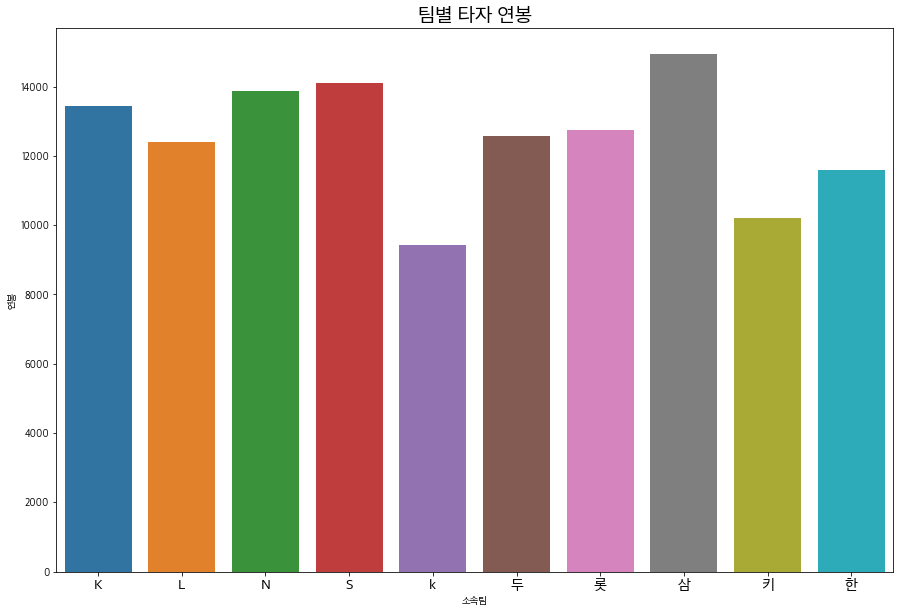

In [16]:
# 평균 연봉이 가장 높은 팀은?
plt.figure(figsize= (15,10),facecolor = 'white')
sns.barplot(x = '소속팀',y = '연봉', data = 연봉)
plt.xticks(fontsize=15)
plt.title('팀별 타자 연봉', fontsize= 20)

# font 깨지는 건 나중에. 
# 우선 삼성이 가장 높고, 한화,롯데,NC 순으로 높다. 역시 팀별로 연봉의 차이가 꽤 난다. 
# 엘지도 꽤 돈 많이 주는 팀으로 알고 있는데... 생각보다 적다. 
# 이건 생각해보니 타자만 본 것.... 투수도 봐야한다. 

In [56]:
# 팀별로 연봉 체계가 다르기 때문에 더미화 시켜준다. 
hitter = pd.get_dummies(hitter, columns = ['소속팀'], drop_first=True)

In [66]:
X = hitter.drop(columns = ['연봉','이름','년도'])
y = np.log(hitter['연봉'])
X = sm.add_constant(X)

In [67]:
# 회귀분석으로 연봉과 연관 있는지 확인해보자
import statsmodels.api as sm
model = sm.OLS(y,X).fit()

In [68]:
# 상관관계가 매우 높다. 이대로 바로 분석에 사용할 순 없다. 
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     연봉   R-squared:                       0.481
Model:                            OLS   Adj. R-squared:                  0.477
Method:                 Least Squares   F-statistic:                     120.1
Date:                Fri, 08 May 2020   Prob (F-statistic):               0.00
Time:                        23:31:55   Log-Likelihood:                -3762.6
No. Observations:                3391   AIC:                             7579.
Df Residuals:                    3364   BIC:                             7745.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.7928      0.117     66.554      0.0

Text(0.5, 1.0, '타자 변수별 상관관계')

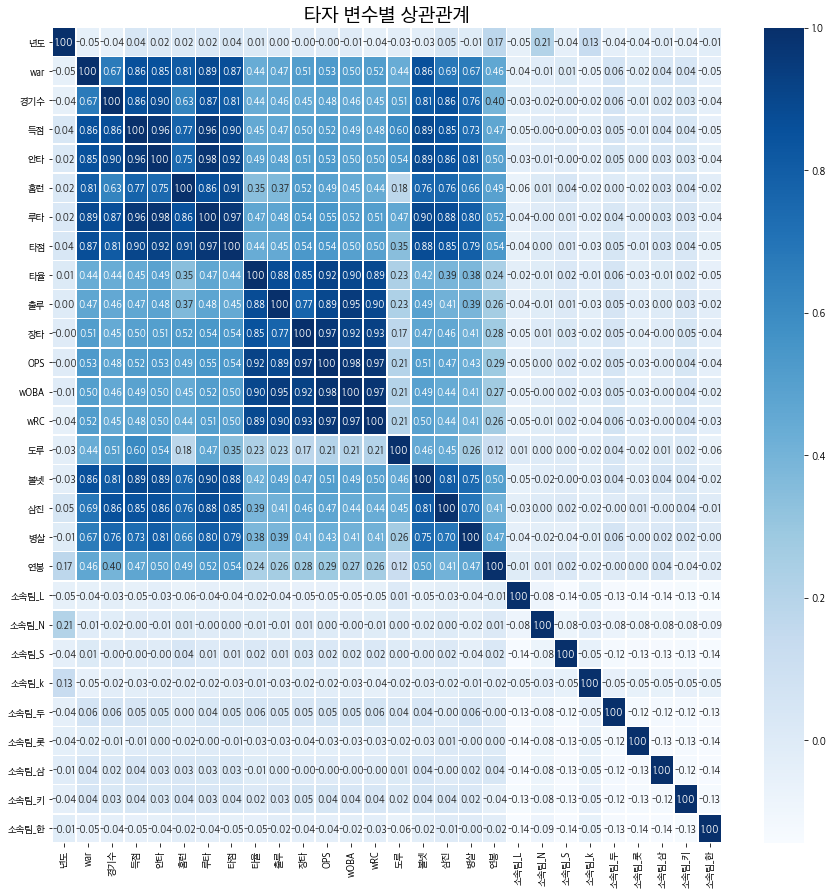

In [37]:
# 강한 상관관계들이 보인다. 이대로 쓰게 되면 예측할 때 좋지않은 결과가 나올수도 있다. 
plt.figure(figsize=(15,15),facecolor = 'white')
sns.heatmap(data = hitter.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')
plt.title('타자 변수별 상관관계',fontsize= 20)

Text(0.5, 1.0, '타자 연봉 분포')

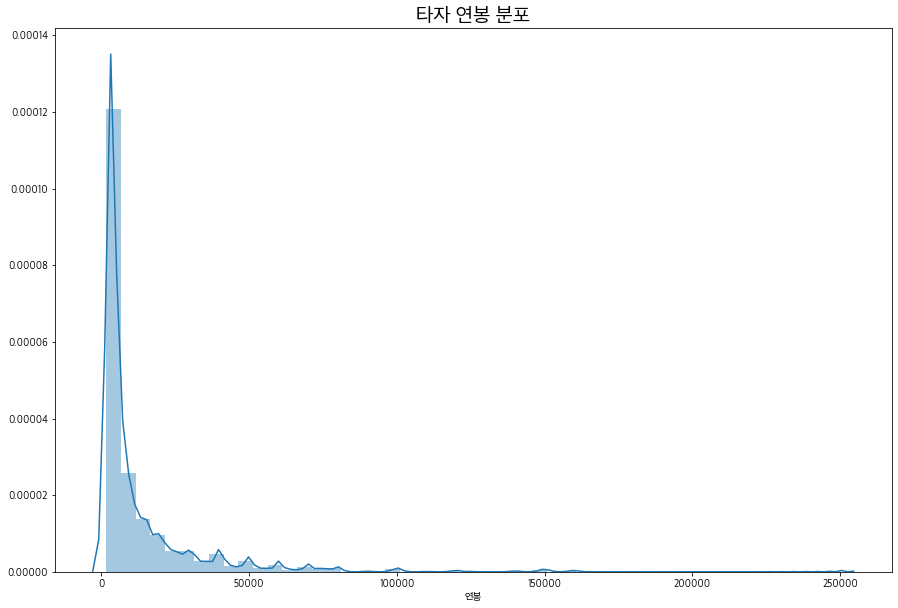

In [71]:
# 약간의 왜곡이 보인다. 정규분포화 시켜준다
plt.figure(figsize = (15,10),facecolor = 'white')
sns.distplot(hitter['연봉'])
plt.title('타자 연봉 분포', fontsize= 20)

In [39]:
import numpy as np

Text(0.5, 1.0, '타자 연봉 분포')

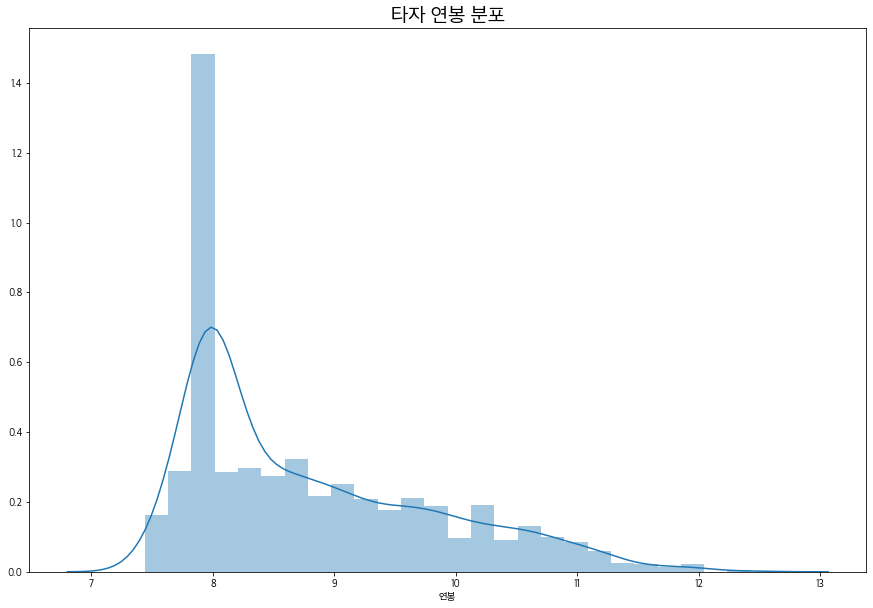

In [72]:
# 약간의 왜곡이 보인다. 정규분포화 시켜준다
plt.figure(figsize = (15,10),facecolor = 'white')
sns.distplot(np.log(hitter['연봉']))
plt.title('타자 연봉 분포', fontsize= 20)

# 투수 분석

In [27]:
pitcher = pd.read_csv('투수 최종.csv')

In [28]:
del pitcher['Unnamed: 0']

In [29]:
pitcher.isnull().sum()

이름          0
년도          0
팀           0
war         0
경기수         0
완봉          0
완투          0
선발          0
승           0
패           0
세이브         0
홀드          0
inning      0
실점          0
ERA         0
FIP         0
WHIP        0
ERA_plus    0
FIP_plus    0
자책          0
볼넷          0
홈런          0
삼진          0
연봉          0
dtype: int64

In [30]:
pitcher

,이름,년도,팀,war,경기수,완봉,완투,선발,승,패,...,ERA,FIP,WHIP,ERA_plus,FIP_plus,자책,볼넷,홈런,삼진,연봉
0,류현진,10,한,9.20,25.0,5.0,3.0,25.0,16.0,4.0,...,1.82,2.90,1.01,253.6,159.5,39.0,45.0,11.0,187.0,27000.0
1,리오스,7,두,8.15,33.0,6.0,4.0,33.0,22.0,5.0,...,2.07,2.94,1.06,186.8,131.5,54.0,58.0,8.0,147.0,0.0
2,양현종,15,K,8.14,32.0,1.0,1.0,31.0,15.0,6.0,...,2.44,4.57,1.24,202.1,108.5,50.0,78.0,18.0,157.0,75000.0
3,류현진,6,한,7.78,30.0,6.0,1.0,28.0,18.0,6.0,...,2.23,2.15,1.05,168.0,174.6,50.0,52.0,11.0,204.0,0.0
4,리오스,4,K,7.41,32.0,3.0,2.0,32.0,17.0,8.0,...,2.87,3.50,1.25,152.1,124.8,71.0,70.0,10.0,145.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3498,김민우,19,한,-1.22,16.0,1.0,0.0,12.0,2.0,7.0,...,6.75,4.79,1.62,61.4,87.0,51.0,30.0,6.0,46.0,3600.0
3499,진야곱,15,두,-1.30,47.0,0.0,0.0,14.0,5.0,9.0,...,7.01,5.11,1.83,66.9,91.4,80.0,68.0,12.0,108.0,6000.0
3500,김대우,17,삼,-1.32,25.0,0.0,0.0,7.0,2.0,5.0,...,9.54,6.48,1.94,53.2,77.7,53.0,26.0,7.0,28.0,15000.0
3501,배영수,15,한,-1.55,32.0,0.0,0.0,21.0,4.0,11.0,...,7.04,6.78,1.61,70.8,72.9,79.0,39.0,21.0,56.0,55000.0


In [82]:
# 900000은 그 시기에 은퇴해서 연봉 업데이트가 안됨. 따라서 전년도 연봉으로 처리한다. 
a = pitcher.loc[pitcher['연봉']== 900000 ]['이름']
b = pitcher.loc[pitcher['연봉']== 900000 ]['년도']

In [ ]:
for i,j  in zip(a,b):
    try:
        pitcher.loc[(pitcher['이름']==i) & (pitcher['년도'] == j) & (pitcher['연봉'] == 900000),'연봉'] = list(pitcher.loc[(pitcher['이름']==i) & (pitcher['년도'] == j-1),'연봉'])[0]
    except:
         pitcher.loc[(pitcher['이름']==i) & (pitcher['년도'] == j) & (pitcher['연봉'] == 900000),'연봉'] = 3000

In [ ]:
pitcher.loc[pitcher['연봉'] == 0,'연봉'] = 3000

In [ ]:
# 소속팀을 현재 팀에 맞게 설정해준다. 
pitcher.loc[pitcher['팀'] == '현','팀'] = '넥'
pitcher.loc[pitcher['팀'] == '넥','팀'] = '키'
pitcher.loc[pitcher['팀'] == '히','팀'] = '키'

In [ ]:
연봉_투수 = pitcher.groupby('팀')['연봉'].mean().reset_index()

Text(0.5, 1.0, '팀별 투수 연봉')

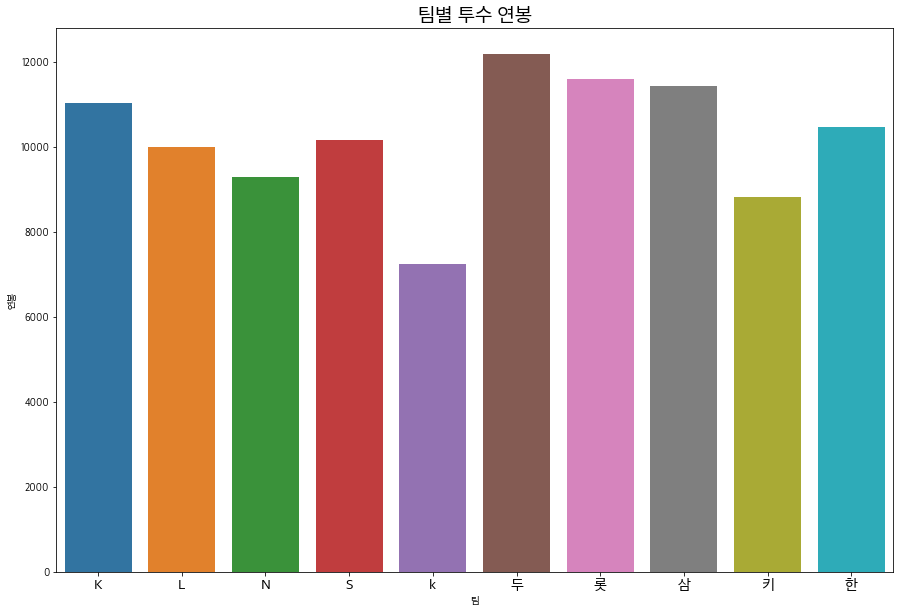

In [38]:
# 평균 연봉이 가장 높은 팀은?

plt.figure(figsize= (15,10),facecolor = 'white')
sns.barplot(x= '팀', y = '연봉', data= 연봉_투수)
plt.xticks(fontsize=15)
plt.title('팀별 투수 연봉', fontsize= 20)

# font 깨지는 건 나중에. 
# 투수의 경우 기아와 엘지가 많이 높다. 그리고 한화, SK 순이다.

In [41]:
pitcher = pd.get_dummies(pitcher, columns = ['팀'], drop_first=True)

Text(0.5, 1.0, '투수 변수별 상관관계')

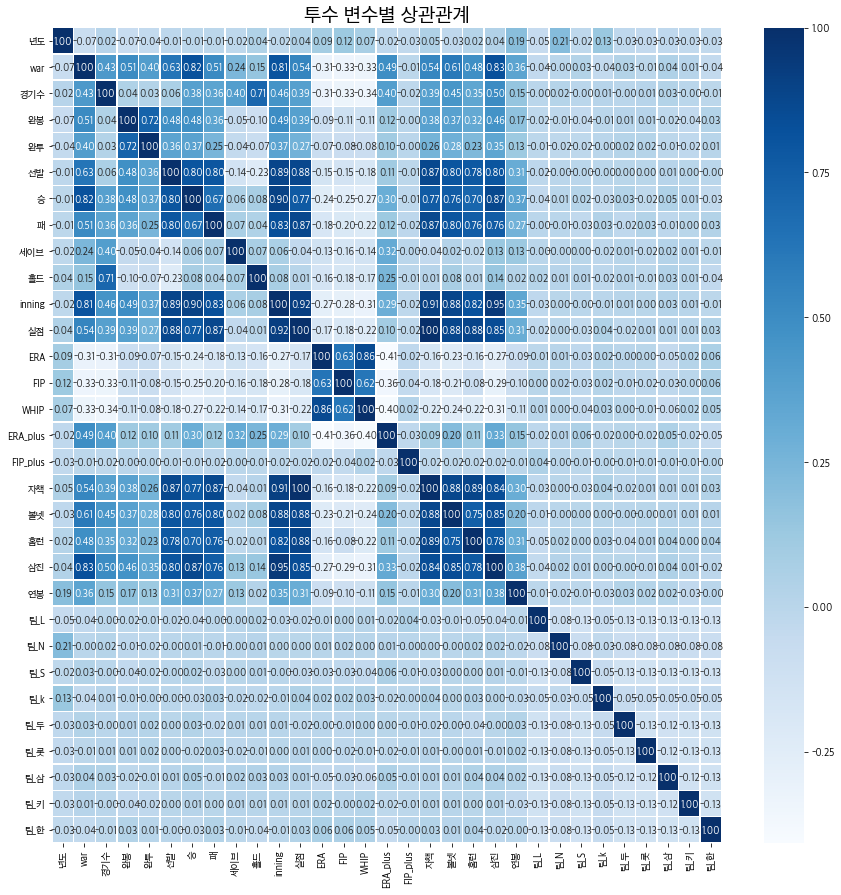

In [42]:
# 강한 상관관계들이 보인다. 이대로 쓰게 되면 예측할 때 좋지않은 결과가 나올수도 있다. 
plt.figure(figsize=(15,15),facecolor = 'white')
sns.heatmap(data = pitcher.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')
plt.title('투수 변수별 상관관계',fontsize= 20)

Text(0.5, 1.0, '투수 연봉 분포')

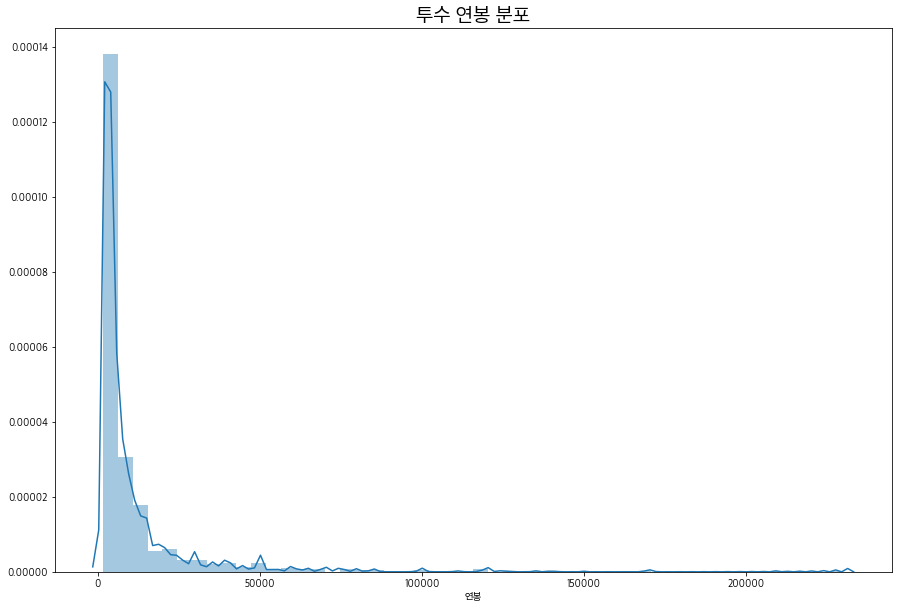

In [74]:
# 이것도 마찬가지로 값에 왜곡이 보인다. 
plt.figure(figsize = (15,10),facecolor = 'white')
sns.distplot(pitcher['연봉'])
plt.title('투수 연봉 분포',fontsize =20)

Text(0.5, 1.0, '투수 연봉 분포')

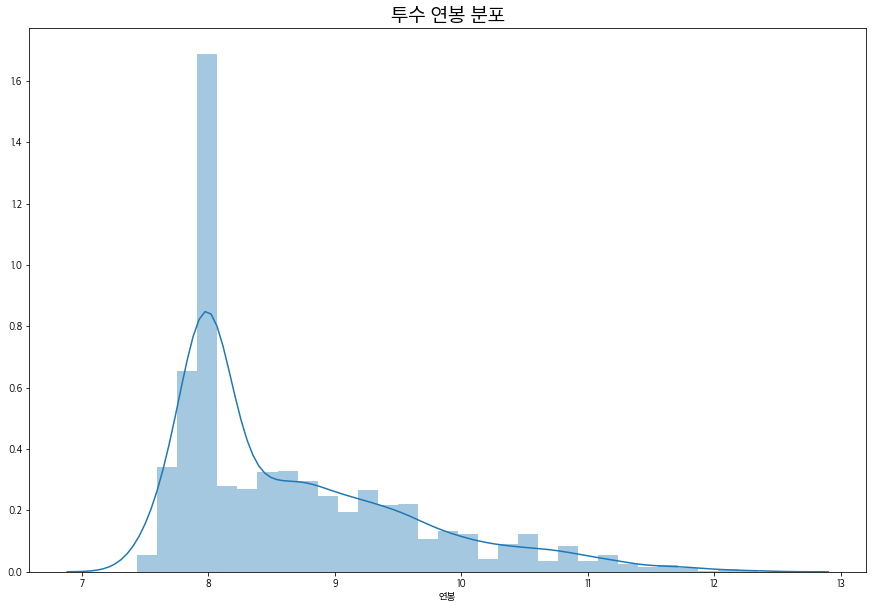

In [75]:
plt.figure(figsize = (15,10),facecolor = 'white')
sns.distplot(np.log(pitcher['연봉']))
plt.title('투수 연봉 분포',fontsize =20)

In [80]:
X = pitcher.drop(columns = ['연봉','이름','년도'])
y = np.log(pitcher['연봉'])
X = sm.add_constant(X)

In [81]:
model = sm.OLS(y,X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     연봉   R-squared:                       0.287
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     48.24
Date:                Sat, 09 May 2020   Prob (F-statistic):          6.72e-230
Time:                        00:09:57   Log-Likelihood:                -4134.2
No. Observations:                3503   AIC:                             8328.
Df Residuals:                    3473   BIC:                             8513.
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.0965      0.068    118.328      0.0